Data Transaction:
https://drive.google.com/file/d/1hkrTWbhHdLwgQmJq0kBqVx2TrtD99xIH/view?usp=sharing 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('transaction_data.csv') # Membaca dataset
df.isna().sum() # Mengecek data kosong / missing value
df.dropna(inplace=True) # Menghapus data yang memiliki missing value
df.duplicated().sum() # Mengecek data duplikat

np.int64(0)

In [5]:
# Mengubah kolom 'InvoiceDate' dan 'transaction_date' ke format datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19445 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               19445 non-null  int64         
 1   transaction_id           19445 non-null  int64         
 2   product_id               19445 non-null  int64         
 3   CustomerID               19445 non-null  int64         
 4   transaction_date         19445 non-null  datetime64[ns]
 5   online_order             19445 non-null  object        
 6   order_status             19445 non-null  object        
 7   brand                    19445 non-null  object        
 8   product_line             19445 non-null  object        
 9   product_class            19445 non-null  object        
 10  product_size             19445 non-null  object        
 11  list_price               19445 non-null  float64       
 12  standard_cost            19445 non-nu

In [6]:
# Memanggil data yang tidak dibatalkan
df = df[df['order_status'] != 'Cancelled']
df

,Unnamed: 0,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19996,19996,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19997,19997,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19998,19998,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


## Recency (R)

In [7]:
# Mencari hari terakhir pada data (tanggal terkini) berdasarkan kolom 'InvoiceDate'
current_date = df['InvoiceDate'].max()
current_date

# Mencari tanggal terakhir (last transaction) untuk setiap customer
last_transaction = df.groupby('CustomerID')['InvoiceDate'].max()
last_transaction

# Mencari selisih antara tanggal terkini (current date) dengan tanggal terakhir customer belanja (last transaction)
current_date - last_transaction

# Menghitung nilai Recency dengan menghitung selisih antara current date dengan last transaction
recency = (current_date - last_transaction).dt.days
recency = recency.rename('Recency')
recency

CustomerID
1         7
2       128
3       102
4       195
5        16
       ... 
3497     52
3498    127
3499     51
3500    144
5034     84
Name: Recency, Length: 3490, dtype: int64

## Frequency (F)

In [8]:
# Menghitung nilai Frequency dengan menghitung jumlah transaksi per customer 
frequency = df.groupby('CustomerID')['transaction_id'].nunique().rename('frequency')
frequency

CustomerID
1       11
2        3
3        7
4        2
5        6
        ..
3497     3
3498     6
3499     7
3500     6
5034     3
Name: frequency, Length: 3490, dtype: int64

## Monetery (M)

In [9]:
# Menghitung nilai Monetary dengan menghitung total nilai transaksi per customer
monetary = df.groupby('CustomerID')['list_price'].sum().rename('Monetary')
monetary

CustomerID
1       9084.45
2       4149.07
3       9525.22
4       1047.72
5       5903.20
         ...   
3497    3744.07
3498    5177.06
3499    7673.48
3500    4922.41
5034    1519.92
Name: Monetary, Length: 3490, dtype: float64

## DataFrame RFM

In [10]:
# Membuat dataframe dengan kolom-kolom Recency, Frequency, dan Monetary
rfm = pd.DataFrame({
    'Recency': recency, 
    'Frequency': frequency, 
    'Monetary': monetary
}).reset_index()
rfm

,CustomerID,Recency,Frequency,Monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,3,102,7,9525.22
3,4,195,2,1047.72
4,5,16,6,5903.20
...,...,...,...,...
3485,3497,52,3,3744.07
3486,3498,127,6,5177.06
3487,3499,51,7,7673.48
3488,3500,144,6,4922.41


## Describe RFM

In [11]:
# Melakukan pengecekan dataframe rfm
round(rfm.describe(),2)

,CustomerID,Recency,Frequency,Monetary
count,3490.00,3490.00,3490.00,3490.00
mean,1750.09,62.85,5.52,6113.58
std,1011.35,59.37,2.28,2898.02
min,1.00,0.00,1.00,60.34
25%,876.25,18.00,4.00,4023.00
50%,1749.50,45.00,5.00,5829.05
75%,2622.75,88.00,7.00,7934.46
max,5034.00,353.00,14.00,19071.32


## Histogram dan Boxplot RFM

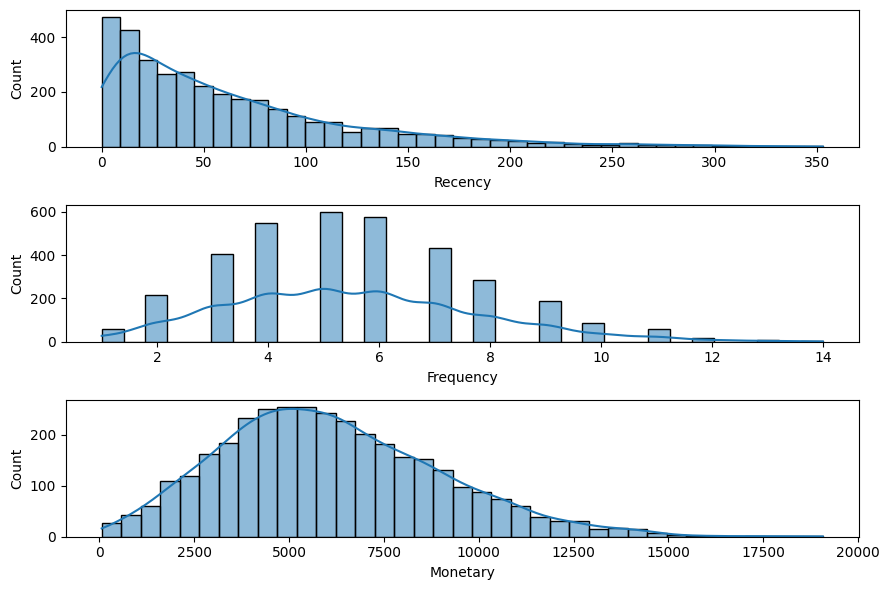

In [12]:
# Membuat histogram untuk Recency, Frequency, dan Monetary
plt.figure(figsize=(9,6))

plt.subplot(3,1,1)
sns.histplot(rfm['Recency'], kde=True)

plt.subplot(3,1,2)
sns.histplot(rfm['Frequency'], kde=True)

plt.subplot(3,1,3)
sns.histplot(rfm['Monetary'], kde=True)

plt.tight_layout()
plt.show()

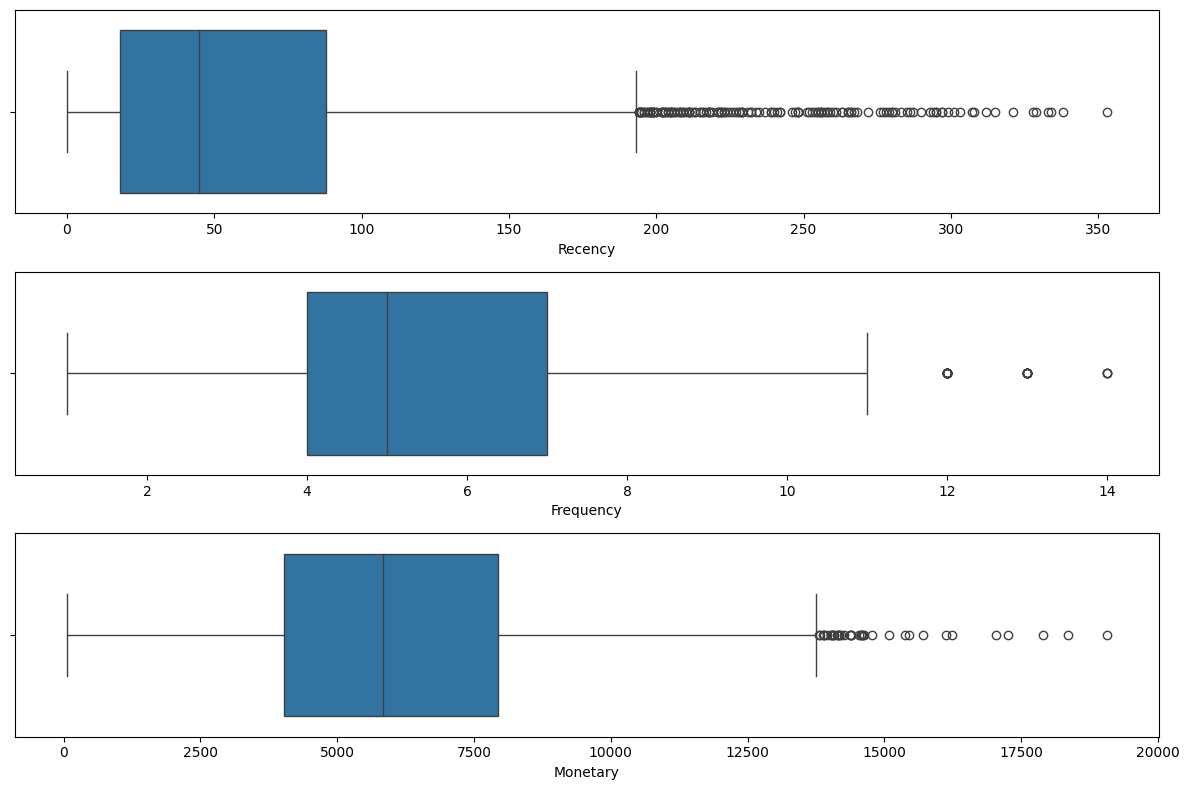

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
sns.boxplot(x = rfm['Recency'])

plt.subplot(3,1,2)
sns.boxplot(x = rfm['Frequency'])

plt.subplot(3,1,3)
sns.boxplot(x = rfm['Monetary'])


plt.tight_layout()
plt.show()

- Recency
    - customer kita kebanyakan terakhir membeli sekitar 18 - 88 hari yang lalu (cukup baru)
- Frequency
    - customer kita kebanyakan baru 4 sampai 7 kali membeli ulang / re purchase
- Monetary
    - customer kita kebanyakan jumlah nominalnya antara 4000 - 7900 dollar

## RFM Score

In [47]:
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3490.000000,3490.000000,3490.000000,3490.000000
mean,1750.092837,62.847564,5.522350,6113.584424
std,1011.348380,59.365082,2.275693,2898.017543
min,1.000000,0.000000,1.000000,60.340000
25%,876.250000,18.000000,4.000000,4023.002500
50%,1749.500000,45.000000,5.000000,5829.050000
75%,2622.750000,88.000000,7.000000,7934.462500
max,5034.000000,353.000000,14.000000,19071.320000


In [13]:
def rfm_score(baris):
    # recency
    if baris['Recency'] <= 18:
        r = 4
    elif baris['Recency'] <= 45:
        r = 3
    elif baris['Recency'] <= 88:
        r = 2
    else:
        r = 1
        
    # frequency
    if baris['Frequency'] <= 3:
        f = 1
    elif baris['Frequency'] <= 5:
        f = 2
    elif baris['Frequency'] <= 10:
        f = 3
    else:
        f = 4
        
    # monetary
    if baris['Monetary'] <= 4000:
        m = 1
    elif baris['Monetary'] <= 5800:
        m = 2
    elif baris['Monetary'] <= 7900:
        m = 3
    else:
        m = 4
        
    return pd.Series({'R_Score': r, 'F_Score': f, 'M_Score': m})

rfm[['R_Score', 'F_Score', 'M_Score']] = rfm.apply(rfm_score, axis=1)
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
rfm.sort_values('RFM_Score', ascending=False)

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
234,235,2,11,9629.61,4,4,4,12
2819,2826,11,12,11244.57,4,4,4,12
141,142,4,11,12474.74,4,4,4,12
667,669,8,11,12187.94,4,4,4,12
830,832,17,11,12410.17,4,4,4,12
...,...,...,...,...,...,...,...,...
2083,2089,147,2,477.32,1,1,1,3
2084,2090,163,2,1020.78,1,1,1,3
2035,2040,96,2,3028.89,1,1,1,3
2042,2047,279,1,1289.85,1,1,1,3


In [49]:
rfm['Rank'] = rfm['Monetary'].rank(method='dense', ascending=False)

# Menampilkan hasil dengan sorting berdasarkan ranking
rfm = rfm.sort_values('Rank')

rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Rank
2177,2183,8,14,19071.32,4,4,4,12,1.0
1125,1129,26,13,18349.27,3,4,4,11,2.0
937,941,33,10,17898.46,3,3,4,10,3.0
2781,2788,44,11,17258.94,3,4,4,11,4.0
1298,1302,29,13,17035.83,3,4,4,11,5.0
...,...,...,...,...,...,...,...,...,...
2417,2423,59,1,202.62,2,1,1,4,3459.0
3180,3189,56,2,200.70,2,1,1,4,3460.0
2268,2274,55,2,142.98,2,1,1,4,3461.0
2526,2532,140,1,71.49,1,1,1,3,3462.0


## RFM Segmentantion

In [ ]:
rfm['FM_Score'] = rfm['F_Score'] + rfm['M_Score']

def segment_customer(row):
    recency = row['R_Score']
    fm_combined = row['FM_Score']
    if recency >= 4 and fm_combined >= 4:
        return 'Champions'
    elif recency >= 3 and fm_combined >= 3:
        return 'Loyal Customers'
    elif recency >= 2 and fm_combined >= 3:
        return 'Potential Loyalist'
    elif recency >= 3 and fm_combined <= 2:
        return 'Promising'
    elif recency < 2 and fm_combined >= 3:
        return 'At Risk'
    elif recency < 2 and fm_combined <= 2:
        return 'Lost'
    else:
        return 'Uncategorized'

rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Rank,FM_Score,Customer_Segment
2177,2183,8,14,19071.32,4,4,4,12,1.0,8,Champions
1125,1129,26,13,18349.27,3,4,4,11,2.0,8,Loyal Customers
937,941,33,10,17898.46,3,3,4,10,3.0,7,Loyal Customers
2781,2788,44,11,17258.94,3,4,4,11,4.0,8,Loyal Customers
1298,1302,29,13,17035.83,3,4,4,11,5.0,8,Loyal Customers
...,...,...,...,...,...,...,...,...,...,...,...
2417,2423,59,1,202.62,2,1,1,4,3459.0,2,Uncategorized
3180,3189,56,2,200.70,2,1,1,4,3460.0,2,Uncategorized
2268,2274,55,2,142.98,2,1,1,4,3461.0,2,Uncategorized
2526,2532,140,1,71.49,1,1,1,3,3462.0,2,Lost


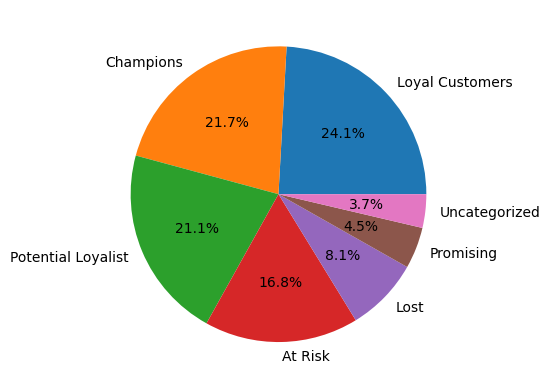

In [51]:
plt.pie(rfm['Customer_Segment'].value_counts(), labels=rfm['Customer_Segment'].value_counts().index, autopct='%1.1f%%')
plt.show()


In [52]:
import plotly as py
import plotly.graph_objs as go

# Buat pemetaan warna untuk setiap segmen customer
color_map = {
    'Champions': 'blue',
    'Loyal Customers': 'green',
    'Potential Loyalist': 'orange',
    'Promising': 'purple',
    'At Risk': 'red',
    'Lost': 'gray',
    'Uncategorized': 'black'
}

# Ubah warna marker menggunakan pemetaan
colors = [color_map[segment] for segment in rfm['Customer_Segment']]

trace1_non_ml = go.Scatter3d(
    x=rfm['Recency'],
    y=rfm['Frequency'],
    z=rfm['Monetary'],
    mode='markers',
    marker=dict(color=colors, size=5, opacity=0.8)  # Gunakan colors
)

dataa1_non_ml = [trace1_non_ml]

layout1_non_ml = go.Layout(
    title='Cluster',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    )
)

fig1_non_ml = go.Figure(data=dataa1_non_ml, layout=layout1_non_ml)
py.offline.iplot(fig1_non_ml)